In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [12]:
# Importing data files

data_df = pd.read_csv("Resources/pollution_2006_2010.csv")

data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [13]:
# Removing decimal and zero from 'Year' column
data_df['Year'] = data_df['Year'].astype(str).replace('\.0', '', regex=True)
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


#### Generate a summary statistics table of mean, median, variance, 
#### standard deviation for each pollutants verses county

#### Calculations for O3 AQI:

In [14]:
# Group by County and aggregate mean, median, variance, standard deviation of the O3 AQI (Ozone Air Quality Index) for each County.
stat_O3_df = data_df.groupby(['County']).agg({'O3 AQI': [np.max, np.min, np.mean, np.median, np.var, np.std]})
stat_O3_df.head()

O3 AQI                                               
               amax amin       mean median          var        std
County                                                            
Alameda          46    1  21.600529     22    56.882064   7.542020
Contra Costa    147    3  30.920261     30   200.011289  14.142535
Fresno          207    3  54.517945     42  1487.714793  38.570906
Humboldt         46    2  24.436099     25    58.096084   7.622079
Imperial        147    3  38.517116     36   281.620305  16.781547

In [15]:
# Rename columns for mean, median, variance, standard deviation of the O3 AQI (Ozone Air Quality Index) for each County.

stat_O3_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation']
stat_O3_df.head()

,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
County,,,,,,
Alameda,46,1,21.600529,22,56.882064,7.542020
Contra Costa,147,3,30.920261,30,200.011289,14.142535
Fresno,207,3,54.517945,42,1487.714793,38.570906
Humboldt,46,2,24.436099,25,58.096084,7.622079
Imperial,147,3,38.517116,36,281.620305,16.781547


In [16]:
# Resetting the Index

O3_df = stat_O3_df.reset_index()
O3_df.head()

,County,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,46,1,21.600529,22,56.882064,7.542020
1,Contra Costa,147,3,30.920261,30,200.011289,14.142535
2,Fresno,207,3,54.517945,42,1487.714793,38.570906
3,Humboldt,46,2,24.436099,25,58.096084,7.622079
4,Imperial,147,3,38.517116,36,281.620305,16.781547


#### Visual Representation :

In [17]:
# Creating dataframe for two columns for plotting

max_o3_aqi_df = O3_df[['County', 'Mean']]
max_o3_aqi_df

,County,Mean
0,Alameda,21.600529
1,Contra Costa,30.920261
2,Fresno,54.517945
3,Humboldt,24.436099
4,Imperial,38.517116
5,Los Angeles,32.988742
6,Orange,34.537563
7,Riverside,53.597239
8,Sacramento,37.897085
9,San Bernardino,49.701064


#### # Creating bar plot for Counties Vs. Average Ozone Air Quality Index

<IPython.core.display.Javascript object>


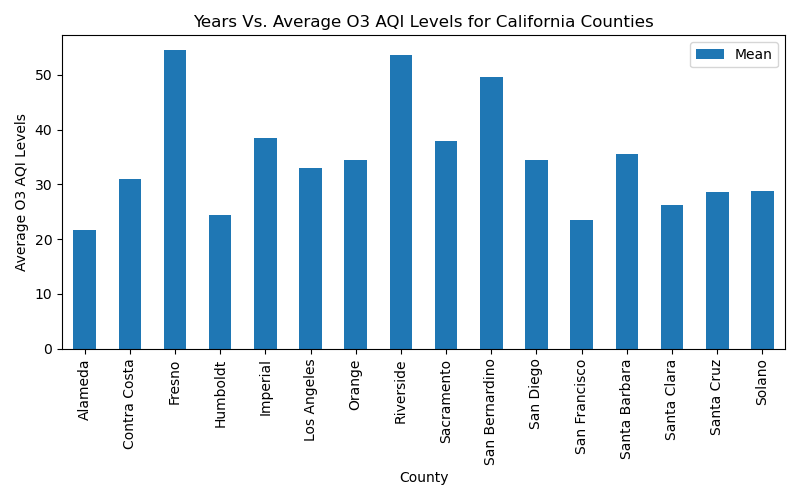

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Use DataFrame.plot() in order to create a bar chart of the data
max_o3_aqi_df.plot(kind="bar", x='County', figsize=(8,5))

# Give our chart some labels and a tile
plt.title("Years Vs. Average O3 AQI Levels for California Counties")
plt.xlabel("County")
plt.ylabel("Average O3 AQI Levels")
plt.show()
plt.tight_layout()

plt.savefig('mq_charts/years_o3.png')


#### Based on extensive scientific evidence about the effects of ozone on public health and welfare, on October 1, 2015, EPA strengthened the ground-level ozone standard to 0.070 ppm, averaged over an 8-hour period.

#### Average Ozone Air Quality Index(2006-2010) Vs. Counties is calculated and and found that 'Fresno' county has the maximum 'Average Ozone Air Quality Index' from (2006-2010) of 62.275591 ppm 